In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
import math as mt
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("C:\\Users\\Acer\\Downloads\\Panion-final-20230421T122412Z-001\\Panion-final\\Notebook-data\\cookie_cats.csv\\cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [7]:
df.groupby('version')['sum_gamerounds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


In [8]:
#unique users
df.shape[0]==df['userid'].nunique()

True

In [9]:
df.groupby('version')['userid'].nunique()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [10]:
df_30=df[df['version']=='gate_30']
df_40=df[df['version']=='gate_40']

<Axes: xlabel='version', ylabel='sum_gamerounds'>

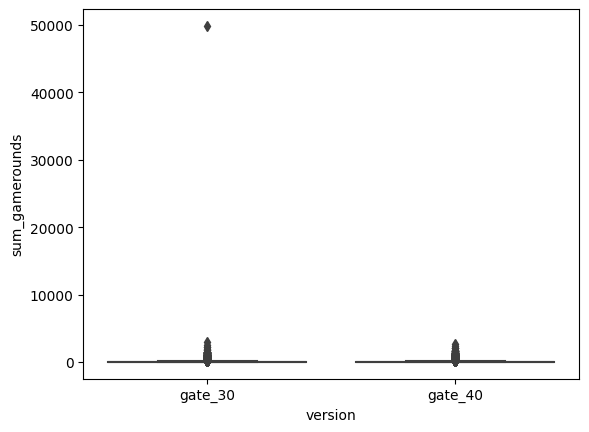

In [11]:
sns.boxplot(data=df,x='version',y='sum_gamerounds')

In [12]:
#Removeoutliers

q=df['sum_gamerounds'].quantile(0.96)
dc=df[df['sum_gamerounds']<q]
dc

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


4.032642561731469 outliers removed


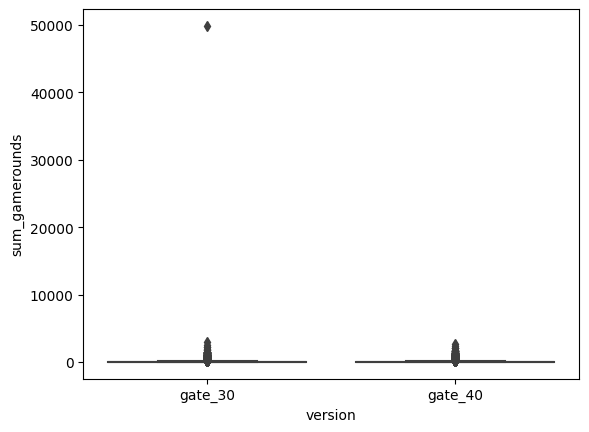

In [13]:
sns.boxplot(data=df,x='version',y='sum_gamerounds')
print((1-len(dc)/len(df))*100,"outliers removed")

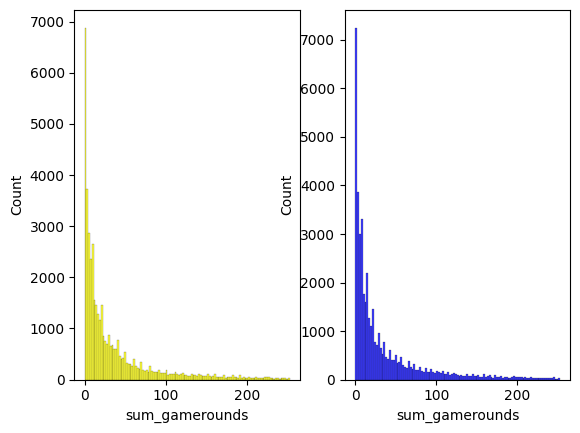

In [14]:
## check data distribution using histogram
fig, axes = plt.subplots(1,2)
sns.histplot(x='sum_gamerounds',data=dc[dc['version']=='gate_30'],color="yellow",label='gate_30',ax=axes[0])
sns.histplot(x='sum_gamerounds',data=dc[dc['version']=='gate_40'],color="blue",label='gate_40',ax=axes[1])
plt.show()

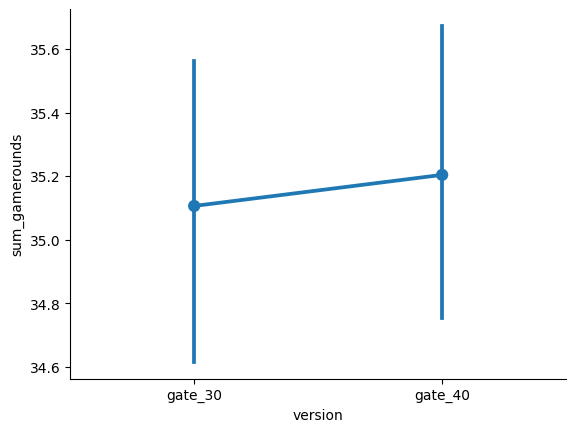

In [15]:
sns.pointplot(x = 'version', y = 'sum_gamerounds', data = dc)
sns.despine()

In [16]:
mean_gate30=dc[dc['version']=='gate_30']['sum_gamerounds'].mean()
mean_gate40=dc[dc['version']=='gate_40']['sum_gamerounds'].mean()

variance_gate30=(mean_gate30*(1-mean_gate30))/dc[dc['version']=='gate_30'].shape[0]
variance_gate40=(mean_gate40*(1-mean_gate40))/dc[dc['version']=='gate_40'].shape[0]



Assumption of normality
After establishing our main hypothesis above, we will now start checking the normality assumption, setting its hypothesis up as follows:

Ho: There is no statistically significant difference between the sample distribution and the normal distribution. (Normal or Gaussian distribution)

Ha: There is a statistically significant difference between the sample distribution and the normal distribution. (Non-Normal distribution)

We will test the assumption by the Shapiro-Wilk test for each group.

In [17]:

from scipy.stats import shapiro,mannwhitneyu
t_valuegate_30,p_valuegate_30=shapiro(dc[dc['version']=='gate_30']['sum_gamerounds'])
t_valuegate_40,p_valuegate_40=shapiro(dc.loc[dc['version']=='gate_40','sum_gamerounds'])


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Non-parametric Mann-Whitney U Test
Before employing the Mann-Whitney U-Test, it is useful to remember our main hypothesis, which we will test here.

Ho: μ0 — μ1 = 0 (no statistically significant difference between the groups)
Ha: μ0 — μ1 ≠ 0



In [18]:
ttest,pvalue=mannwhitneyu(dc[dc['version']=='gate_30']['sum_gamerounds'],dc.loc[dc['version']=='gate_40','sum_gamerounds'])
print(ttest,pvalue)

942842771.0 0.07600155599658807


-  A one sample test is used to compare a single sample mean against a hypothesised value for the population mean.

-  An independent samples  test is used to compare the means of two groups, and tests the null hypothesis that they have the same mean. It comes in two forms: the Student test (Section @ref(studentttest) assumes that the groups  have the same standard deviation, the Welch test does not.

-  A paired samples test is used when you have two scores from each person, and you want to test the null hypothesis that the two scores have the same mean. It is equivalent to taking the difference between the two scores for each person, and then running a one sample test on the difference scores.

-  Effect size calculations for the difference between means can be calculated via the Cohen’s statistic..

-  You can check the normality of a sample using QQ plots and the Shapiro-Wilk test.

- If your data are non-normal, you can use Wilcoxon tests instead of tests.